# 4.9_Task_Intro to Data Visualization with Python_Part_2

## Contents
## Part 2
### Task 1
### Importing Libraries
### Importing Data
### Path to Storage
### Task 2
### Task 3
### Task 4
### Task 5
### Task 6
### Task 7
### Task 8
### Task 9
### Task 10

## Part 2

### Task 1

### Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Path to Storage

In [3]:
# Path to storage location
path = r'C:\Users\ihs10539\Achievement 4 Project'

### Importing Data

In [5]:
df_ords_prods_custs_merge = pd.read_pickle(os.path.join(path, '02_Data', '02.02_Prepared Data', '4.9_task_pt1_ords_prods_custs_merge.pkl'))

### Task 2

In [7]:
# Done
df_ords_prods_custs_merge.columns

Index(['Unnamed: 0_x', 'order_id', 'user_id', 'eval_set', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0.1',
       'Unnamed: 0_y', 'product_name', 'aisle_id', 'department_id', 'prices',
       'match', 'busiest_day', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'average_spend', 'spender_flag',
       'customer_frequency', 'frequency_flag', 'first_name', 'last_name',
       'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', '_merge'],
      dtype='object')

### Task 3

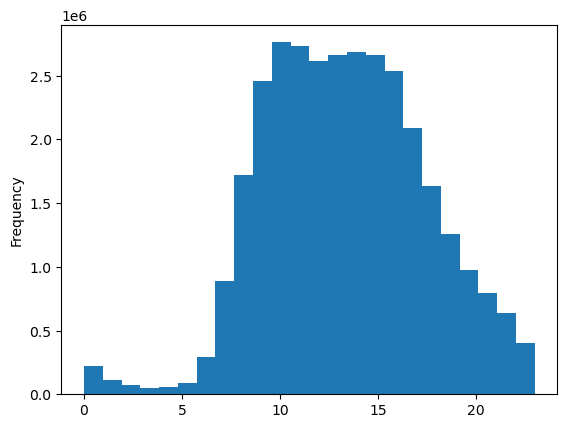

In [11]:
hist_df_ords_prods_custs_merge = df_ords_prods_custs_merge['order_hour_of_day'].plot.hist(bins = 24)

To start off with we have set our bin to 24 hours since that is the natural limit for a day.

As for the frequency I would suggest leadership take into consideration the time period between 09-16 (aka 9 AM to 4 PM).
While there is a bit more of a refined zone in the middle they could further narrow down should they like this would likely give them their highest
frequency while still taking in the timeframe into account.

### Task 4

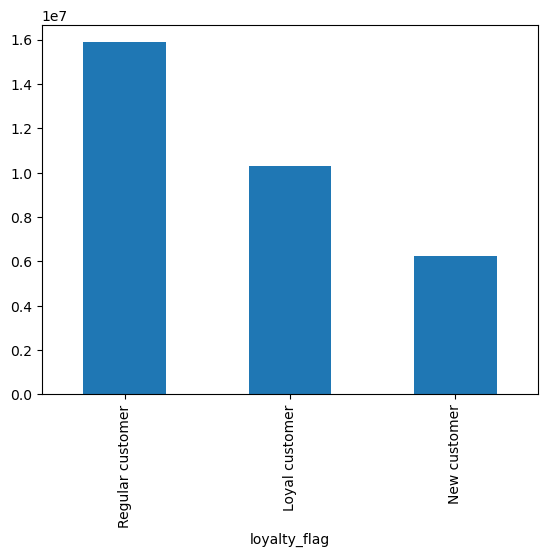

In [15]:
bar_df_ords_prods_custs_merge = df_ords_prods_custs_merge['loyalty_flag'].value_counts().plot.bar()

### Task 5

In [18]:
# Create randomized sample 
np.random.seed(4)

In [20]:
# Going for the 70/30 sampling split
dev = np.random.rand(len(df_ords_prods_custs_merge)) <= 0.7

In [22]:
# function to get the 70%
big_70 = df_ords_prods_custs_merge[dev]

In [24]:
# function to get the 30%
small_30 = df_ords_prods_custs_merge[~dev]

In [26]:
# Checking the whole value to have for next function
len(df_ords_prods_custs_merge)

32399732

In [28]:
# verifying both splits still produce the same whole value
len(big_70) + len( small_30)

32399732

In [29]:
# 30% split subset of the prices and order_hour_of_day going into a new dataframe
df_small_prices_ord_hr = small_30[['order_hour_of_day','prices']]

In [30]:
# Verification
df_small_prices_ord_hr

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0
...,...,...
32399714,12,3.8
32399720,12,8.8
32399722,12,3.2
32399725,12,11.8


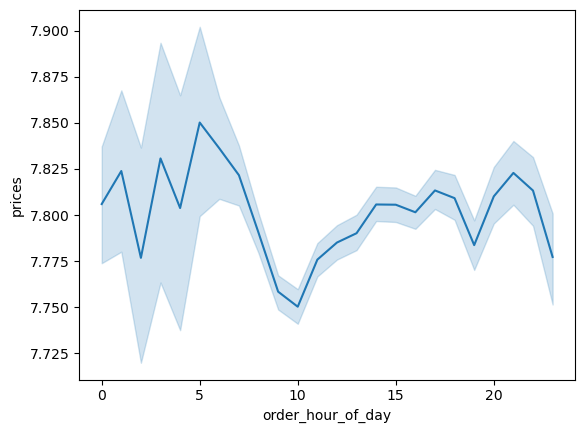

In [31]:
# Create the line chart
line_df_small_prices_ord_hr = sns.lineplot(data = df_small_prices_ord_hr, x = 'order_hour_of_day',y = 'prices')

### Task 6

In [33]:
# 30% split subset of the age and n_dependants going into a new dataframe
df_small_age_dep = small_30[['age','n_dependants']]

In [34]:
# Verification
df_small_age_dep

,age,n_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
32399714,74,3
32399720,74,3
32399722,74,3
32399725,74,3


In [72]:
# Create the line chart
line_df_small_age_dep = plt.pie(data = df_small_age_dep, x = 'age',y = 'n_dependants')

TypeError: pie() got an unexpected keyword argument 'y'

Unfortunately there is no real pattern showing for again vs number of dependants. 
Other analysis will have to be done to find information that can be more fruitfully used. 

### Task 7

In [38]:
# 30% split subset of the age and income going into a new dataframe
df_small_age_income = small_30[['age','income']]

In [39]:
# Verification
df_small_age_income

,age,income
0,31,40423
2,31,40423
3,31,40423
6,31,40423
10,31,40423
...,...,...
32399714,74,137969
32399720,74,137969
32399722,74,137969
32399725,74,137969


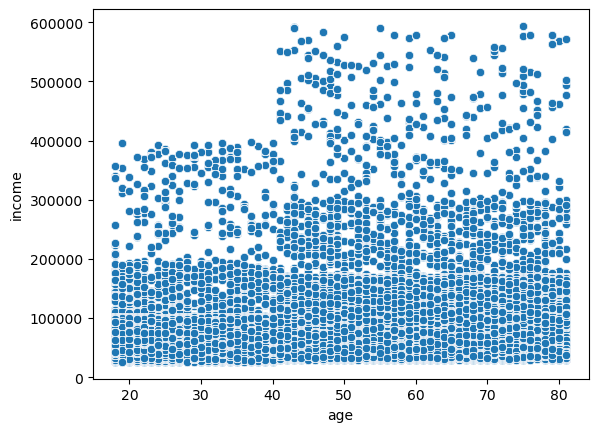

In [40]:
# Create a scatterplot
scatterplot_df_small_age_income = sns.scatterplot(data = df_small_age_income, x = 'age', y = 'income')

The scatterplot suggests that income tends to increase with age which makes sense.
For people under 40, most incomes are under 400k with a concentration around 200k.

For folks above 40 they can be broke into 3 patterns:
1. high concentration - below 200k
2. medium concentration - between 200-300k
3. lower concentration - above 300k

Lastly I did want to point out that there is a rather steep change in income around the 40 year age marker.
Should further statistical analysis into this possible trend be desired. 

In [77]:
# verifying the availablility of columns
df_ords_prods_custs_merge.columns

Index(['Unnamed: 0_x', 'order_id', 'user_id', 'eval_set', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0.1',
       'Unnamed: 0_y', 'product_name', 'aisle_id', 'department_id', 'prices',
       'match', 'busiest_day', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'average_spend', 'spender_flag',
       'customer_frequency', 'frequency_flag', 'first_name', 'last_name',
       'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', '_merge'],
      dtype='object')

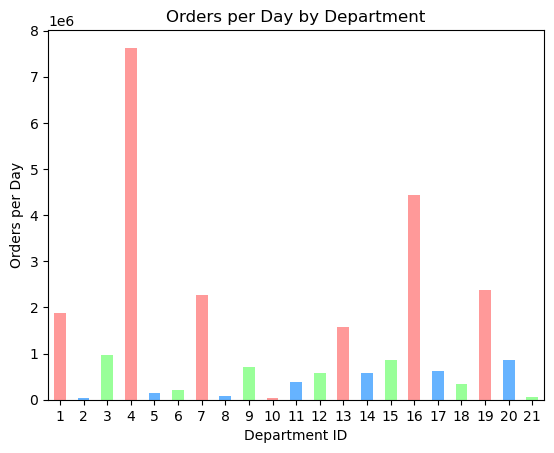

In [89]:
# Assuming 'small_30' is a DataFrame with columns 'department_id' and 'orders_day_of_week'
scatterplot_dept_id_ords_per_day = small_30.groupby('department_id')['orders_day_of_week'].sum().plot.bar(
    color=['#ff9999','#66b3ff','#99ff99']
)

# Set the title and labels
plt.title('Orders per Day by Department')
plt.xlabel('Department ID')
plt.ylabel('Orders per Day')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


### Task 8

In [43]:
# Export Histogram
hist_df_ords_prods_custs_merge.figure.savefig(os.path.join(path, '04_Analysis','04.03_Visualizations', '4.9_Task_pt2_hist_order_hour_of_day.png'))

In [44]:
# Export bar chart
bar_df_ords_prods_custs_merge.figure.savefig(os.path.join(path, '04_Analysis','04.03_Visualizations', '4.9_Task_pt2_bar_loyalty_flag.png'))

In [45]:
# Export Line chart - prices & orders_hour
line_df_small_prices_ord_hr.figure.savefig(os.path.join(path, '04_Analysis','04.03_Visualizations', '4.9_Task_pt2_expenditure_over_hours_of_day.png'))

In [46]:
# Export Line chart - age & n_dependants
line_df_small_age_dep.figure.savefig(os.path.join(path, '04_Analysis','04.03_Visualizations', '4.9_Task_pt2_age_and_n_dependents.png'))

In [47]:
# Export scatterplot - age & income
scatterplot_df_small_age_income.figure.savefig(os.path.join(path, '04_Analysis','04.03_Visualizations', '4.9_Task_pt2_scatterplot_age_spending_power.png'))

### Task 9

In [49]:
# Done

### Task 10

In [51]:
# Done